In [1]:
import pandas as pd
import numpy as np
from sklearn import * 
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
path = "/data/kaggle/data_combined_cleaned.csv"
df = pd.read_csv(path)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [5]:
df = df.drop(columns= ["Id"])

In [6]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non-null object
MasVnrType       2919 no

In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

In [10]:

target = "SalesPrice"
y = np.log(df[target])
X = df.drop(columns=[target])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                 test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                            , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])


pipe.fit(X_train, y_train)

est = pipe.steps[-1][-1]

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("test r2: ", metrics.r2_score(y_test, y_test_pred))
print("train r2: ", metrics.r2_score(y_train, y_train_pred))
print("test rmse: ", metrics.mean_squared_error(y_test, y_test_pred) ** 0.5)
print("train rmse: ", metrics.mean_squared_error(y_train, y_train_pred) ** 0.5)


test r2:  -3.0715943247509893e+22
train r2:  0.9494518297088844
test rmse:  76190488351.17424
train rmse:  0.08606817747710854


In [11]:
scaler = preprocessing.StandardScaler()

In [12]:
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [13]:
pca = decomposition.PCA()
pca.fit(X_train_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [21]:
X_train.shape

(1022, 258)

In [22]:
pca.explained_variance_ratio_.shape

(258,)

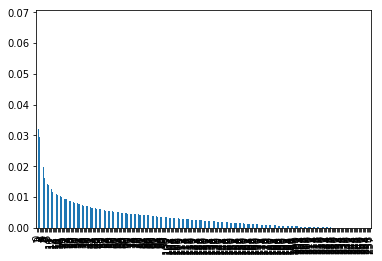

In [15]:
pd.Series(pca.explained_variance_ratio_).plot.bar()

In [23]:
var_original = pd.Series(np.var(X_train_std, axis = 0))
var_original.shape

(258,)

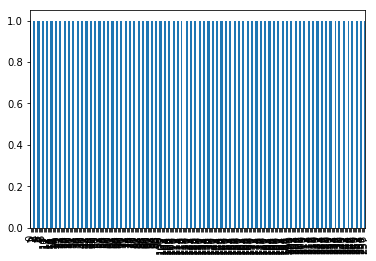

In [24]:
var_original.plot.bar()

In [30]:
pca_var_cs = pd.Series(pca.explained_variance_ratio_.cumsum())
pd.DataFrame({"pca_var": pca_var_cs, "pca_var_cs": pca_var_cs})

,pca_var,pca_var_cs
0,0.067282,0.067282
1,0.099486,0.099486
2,0.128906,0.128906
3,0.154868,0.154868
4,0.177203,0.177203
5,0.197008,0.197008
6,0.213275,0.213275
7,0.229186,0.229186
8,0.243309,0.243309
9,0.257249,0.257249


In [31]:
pca_var_cs[pca_var_cs>0.99]

191    0.990123
192    0.990671
193    0.991193
194    0.991700
195    0.992199
196    0.992689
197    0.993150
198    0.993589
199    0.994012
200    0.994427
201    0.994819
202    0.995196
203    0.995569
204    0.995918
205    0.996259
206    0.996577
207    0.996889
208    0.997184
209    0.997439
210    0.997673
211    0.997905
212    0.998124
213    0.998302
214    0.998466
215    0.998620
216    0.998763
217    0.998892
218    0.999014
219    0.999121
220    0.999222
         ...   
228    0.999737
229    0.999779
230    0.999816
231    0.999848
232    0.999875
233    0.999900
234    0.999925
235    0.999948
236    0.999964
237    0.999979
238    0.999987
239    0.999993
240    0.999998
241    1.000000
242    1.000000
243    1.000000
244    1.000000
245    1.000000
246    1.000000
247    1.000000
248    1.000000
249    1.000000
250    1.000000
251    1.000000
252    1.000000
253    1.000000
254    1.000000
255    1.000000
256    1.000000
257    1.000000
Length: 67, dtype: float

In [33]:
pca = decomposition.PCA(n_components=0.99)
pca.fit_transform(X_train_std).shape

(1022, 192)

In [46]:

target = "SalesPrice"
y = np.log(df[target])
X = df.drop(columns=[target])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                 test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                            , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("pca", decomposition.PCA(n_components= 10)),
    ("est", linear_model.LinearRegression())
])


#est = pipe.steps[-1][-1]
#print("pca components: ", est.coef_.shape[1])


pipe.fit(X_train, y_train)

est = pipe.steps[-1][-1]

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("test r2: ", metrics.r2_score(y_test, y_test_pred))
print("train r2: ", metrics.r2_score(y_train, y_train_pred))
print("test rmse: ", metrics.mean_squared_error(y_test, y_test_pred) ** 0.5)
print("train rmse: ", metrics.mean_squared_error(y_train, y_train_pred) ** 0.5)


test r2:  0.8225760626580058
train r2:  0.8149563675834992
test rmse:  0.1831154275672675
train rmse:  0.164674729720649


In [45]:
pca = decomposition.PCA(n_components=0.8)
pca.fit_transform(X_train_std).shape

(1022, 95)

In [40]:
pca.explained_variance_/pca.explained_variance_.sum()

array([6.72815762e-02, 3.22044153e-02, 2.94195613e-02, 2.59621235e-02,
       2.23354617e-02, 1.98046839e-02, 1.62671810e-02, 1.59114056e-02,
       1.41229566e-02, 1.39393435e-02, 1.32432628e-02, 1.24965677e-02,
       1.17475978e-02, 1.16818522e-02, 1.14670076e-02, 1.08622252e-02,
       1.05817281e-02, 1.02803051e-02, 1.02043981e-02, 1.00598101e-02,
       9.63798661e-03, 9.45551549e-03, 9.27987754e-03, 9.23979411e-03,
       8.87659917e-03, 8.70254654e-03, 8.62421709e-03, 8.49257442e-03,
       8.18936036e-03, 8.09694526e-03, 7.97860443e-03, 7.87569634e-03,
       7.74274856e-03, 7.55638703e-03, 7.47555772e-03, 7.34967084e-03,
       7.18531841e-03, 7.07282169e-03, 6.95421320e-03, 6.88602279e-03,
       6.74206614e-03, 6.64413440e-03, 6.50705514e-03, 6.47944326e-03,
       6.41445408e-03, 6.31582480e-03, 6.19624837e-03, 6.14541200e-03,
       6.06194942e-03, 5.94970181e-03, 5.86352275e-03, 5.82035763e-03,
       5.68560507e-03, 5.57161968e-03, 5.53293636e-03, 5.51579803e-03,
      

In [41]:
pca.explained_variance_ratio_

array([6.72815762e-02, 3.22044153e-02, 2.94195613e-02, 2.59621235e-02,
       2.23354617e-02, 1.98046839e-02, 1.62671810e-02, 1.59114056e-02,
       1.41229566e-02, 1.39393435e-02, 1.32432628e-02, 1.24965677e-02,
       1.17475978e-02, 1.16818522e-02, 1.14670076e-02, 1.08622252e-02,
       1.05817281e-02, 1.02803051e-02, 1.02043981e-02, 1.00598101e-02,
       9.63798661e-03, 9.45551549e-03, 9.27987754e-03, 9.23979411e-03,
       8.87659917e-03, 8.70254654e-03, 8.62421709e-03, 8.49257442e-03,
       8.18936036e-03, 8.09694526e-03, 7.97860443e-03, 7.87569634e-03,
       7.74274856e-03, 7.55638703e-03, 7.47555772e-03, 7.34967084e-03,
       7.18531841e-03, 7.07282169e-03, 6.95421320e-03, 6.88602279e-03,
       6.74206614e-03, 6.64413440e-03, 6.50705514e-03, 6.47944326e-03,
       6.41445408e-03, 6.31582480e-03, 6.19624837e-03, 6.14541200e-03,
       6.06194942e-03, 5.94970181e-03, 5.86352275e-03, 5.82035763e-03,
       5.68560507e-03, 5.57161968e-03, 5.53293636e-03, 5.51579803e-03,
      